# The Sparks Foundation

# Task 1

## Prediction Using Supervised ML for Prediction of Marks.

### Done by Abdul Farhan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
#Importing Data from Given Link
Data=pd.read_csv('http://bit.ly/w-data')

In [4]:
#Displaying the Data
Data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Plotting of Data on a 2-D Graph to determine the relation between the hours studied by student and the percentage scored respectively.

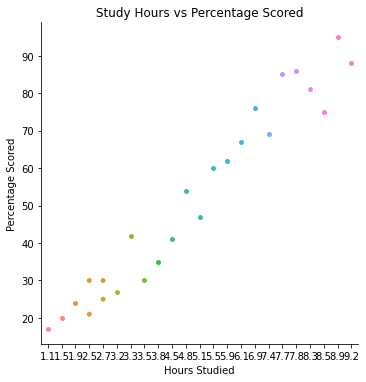

In [5]:
sns.catplot(data=Data,kind="swarm",x="Hours",y="Scores").set(xlabel="Hours Studied",ylabel="Percentage Scored",title="Study Hours vs Percentage Scored")

[Text(0.5, 1.0, 'Study Hours vs Percentage Scores'),
 Text(0.5, 0, 'Hours Studied'),
 Text(0, 0.5, 'Percentage Scored')]

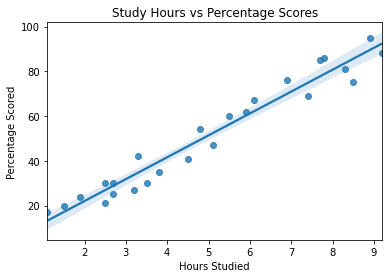

In [6]:
sns.regplot(data=Data,x="Hours",y="Scores").set(title="Study Hours vs Percentage Scores",xlabel="Hours Studied",ylabel="Percentage Scored")

Thus, from the above graph plottings it has been proved that there is a positive linear relation between Hours Studied and Percentage Scored.

# Preparing Our Data

Now, we will define our attributes(Input Variables) and labels(Output Variables)

In [7]:
X=Data.iloc[:, :-1].values #Attributes
y=Data.iloc[:, 1].values #Labels

After defining attributes and labels, we will split the data into training and test sets

In [8]:
#Using Scikit-learn's train_test_split() method
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=101)

# Using Scikit-Learn library

In [9]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [10]:
print("Coefficient-", lr.coef_)
print("Intercept-", lr.intercept_)

Coefficient- [9.96651548]
Intercept- 2.1024930747922284


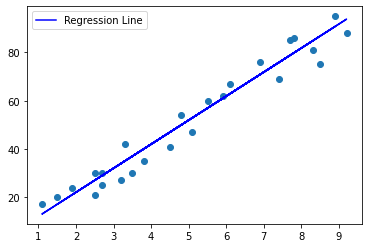

In [11]:
# Plotting the regression line
line=lr.coef_*X+lr.intercept_

# Plotting for Test data
plt.scatter(X,y)
plt.plot(X, line, color="blue", label="Regression Line")
plt.legend()

# Marking Predictions

Since we have trained our Algorithm. Now we will make some predictions.

In [12]:
#Testing Data
print(X_test)

[[2.5]
 [7.7]
 [3.8]
 [7.4]
 [5.5]
 [4.8]
 [3.2]
 [8.5]]


In [13]:
#Predicting the scores
y_pred=lr.predict(X_test)

In [14]:
#Comparing Actual vs Predicted data
df=pd.DataFrame({'Actual' : y_test,'Predicted' : y_pred})

In [15]:
df

,Actual,Predicted
0,30,27.018782
1,85,78.844662
2,35,39.975252
3,69,75.854708
4,60,56.918328
5,54,49.941767
6,27,33.995343
7,75,86.817875


In [16]:
#We can also test with our own data
hours=9.25
own_pred=lr.predict([[hours]])
print("No.of.Hours={}".format(hours))
print("Predicted Score={}".format(own_pred[0]))

No.of.Hours=9.25
Predicted Score=94.29276125536512


# Evaluating the Model

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. WE will use the mean square error here.

In [17]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 5.864954643694258
